In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast # para la transformacion de str a array

from PIL import Image #
import re
import pandasql as sql # para trabajar con los datasets
from tqdm import tqdm # barra de progreso


from sklearn.preprocessing import MinMaxScaler # para llevar los valores de 0 a 1 no sirvio es complicado de usar

## recuperamos informacion de los arrays de la imagenes:

In [2]:
# funcion para importar dataset pick
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# funcion sql
def sql_query(query):
    q=sql.sqldf
    consulta=q(query,globals())
    return consulta

In [3]:
dataset_humano_respuestas_completo=pd.read_csv("/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_humano_respuestas_completo.csv",index_col='indice_2')
dataset_animal_respuestas_completo=pd.read_csv("/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_animal_respuestas_completo.csv",index_col='indice_2')
dataset_objeto_respuestas_completo=pd.read_csv("/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_objeto_respuestas_completo.csv",index_col='indice_2')
dataset_paisaje_respuestas_completo=pd.read_csv("/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_paisaje_respuestas_completo.csv",index_col='indice_2')

dataset_humano_cifar=unpickle('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_humano_cifar_250_v4_29_06_2024.pickle')
dataset_animal_cifar=unpickle('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_animal_cifar_250_v3_29_06_2024.pickle')
dataset_objeto_cifar=unpickle('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_objeto_cifar_250_v3_29_06_2024.pickle')
dataset_paisaje_cifar=unpickle('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_paisaje_cifar_250_v3_29_06_2024.pickle')

In [4]:
import json

def preservar_formato(x):
    return json.dumps(x.tolist())

dataset_humano_cifar['indice_2']=dataset_humano_cifar.index
dataset_humano_cifar['data_lista']=dataset_humano_cifar[b'data'].apply(preservar_formato)

dataset_animal_cifar['indice_2']=dataset_animal_cifar.index
dataset_animal_cifar['data_lista']=dataset_animal_cifar[b'data'].apply(preservar_formato)

dataset_objeto_cifar['indice_2']=dataset_objeto_cifar.index
dataset_objeto_cifar['data_lista']=dataset_objeto_cifar[b'data'].apply(preservar_formato)

dataset_paisaje_cifar['indice_2']=dataset_paisaje_cifar.index
dataset_paisaje_cifar['data_lista']=dataset_paisaje_cifar[b'data'].apply(preservar_formato)

In [5]:
query_humano_recovery_image_bytes='''
SELECT dataset_humano_respuestas_completo.*, dataset_humano_cifar.data_lista FROM dataset_humano_respuestas_completo, dataset_humano_cifar
WHERE dataset_humano_respuestas_completo.indice_2=dataset_humano_cifar.indice_2
'''

query_animal_recovery_image_bytes='''
SELECT dataset_animal_respuestas_completo.*, dataset_animal_cifar.data_lista FROM dataset_animal_respuestas_completo, dataset_animal_cifar
WHERE dataset_animal_respuestas_completo.indice_2=dataset_animal_cifar.indice_2
'''

query_objeto_recovery_image_bytes='''
SELECT dataset_objeto_respuestas_completo.*, dataset_objeto_cifar.data_lista FROM dataset_objeto_respuestas_completo, dataset_objeto_cifar
WHERE dataset_objeto_respuestas_completo.indice_2=dataset_objeto_cifar.indice_2
'''

query_paisaje_recovery_image_bytes='''
SELECT dataset_paisaje_respuestas_completo.*, dataset_paisaje_cifar.data_lista FROM dataset_paisaje_respuestas_completo, dataset_paisaje_cifar
WHERE dataset_paisaje_respuestas_completo.indice_2=dataset_paisaje_cifar.indice_2
'''

dataset_humano_respuestas_completo_bytes_reparado=sql_query(query_humano_recovery_image_bytes)

dataset_animal_respuestas_completo_bytes_reparado=sql_query(query_animal_recovery_image_bytes)

dataset_objeto_respuestas_completo_bytes_reparado=sql_query(query_objeto_recovery_image_bytes)

dataset_paisaje_respuestas_completo_bytes_reparado=sql_query(query_paisaje_recovery_image_bytes)

In [6]:
def recuperar_data_array(x): # esto es necesario para que el string que contiene la imagen se interprete de forma correcta como una estructura de datos y poder acceder a los bytes
    return np.array(json.loads(x),dtype=np.uint8) 

dataset_humano_respuestas_completo_bytes_reparado['data_lista']= dataset_humano_respuestas_completo_bytes_reparado['data_lista'].apply(recuperar_data_array)


dataset_animal_respuestas_completo_bytes_reparado['data_lista']= dataset_animal_respuestas_completo_bytes_reparado['data_lista'].apply(recuperar_data_array)


dataset_objeto_respuestas_completo_bytes_reparado['data_lista']= dataset_objeto_respuestas_completo_bytes_reparado['data_lista'].apply(recuperar_data_array)


dataset_paisaje_respuestas_completo_bytes_reparado['data_lista']= dataset_paisaje_respuestas_completo_bytes_reparado['data_lista'].apply(recuperar_data_array)

In [7]:
### resetear index
dataset_humano_respuestas_completo_bytes_reparado.set_index(dataset_humano_respuestas_completo_bytes_reparado['indice_2'],inplace=True)
dataset_humano_respuestas_completo_bytes_reparado = dataset_humano_respuestas_completo_bytes_reparado.rename(columns={'indice_2': 'indice_main'})

### resetear index animal
dataset_animal_respuestas_completo_bytes_reparado.set_index(dataset_animal_respuestas_completo_bytes_reparado['indice_2'],inplace=True)
dataset_animal_respuestas_completo_bytes_reparado = dataset_animal_respuestas_completo_bytes_reparado.rename(columns={'indice_2': 'indice_main'})

### resetear index objeto
dataset_objeto_respuestas_completo_bytes_reparado.set_index(dataset_objeto_respuestas_completo_bytes_reparado['indice_2'],inplace=True)
dataset_objeto_respuestas_completo_bytes_reparado = dataset_objeto_respuestas_completo_bytes_reparado.rename(columns={'indice_2': 'indice_main'})

### resetear index paisaje
dataset_paisaje_respuestas_completo_bytes_reparado.set_index(dataset_paisaje_respuestas_completo_bytes_reparado['indice_2'],inplace=True)
dataset_paisaje_respuestas_completo_bytes_reparado = dataset_paisaje_respuestas_completo_bytes_reparado.rename(columns={'indice_2': 'indice_main'})

 ### Comenzamos el pre-procesamiento de las salidas de dataseet de las distintas metricas

### Dataset Filtros 1

### Texto

##### Bag

In [18]:
salida_animal_bag=pd.read_csv('Filtro_1/Texto/output_bag/salida_animal_bag_3.csv')
salida_humano_bag=pd.read_csv('Filtro_1/Texto/output_bag/salida_humano_bag_3.csv')
salida_objeto_bag=pd.read_csv('Filtro_1/Texto/output_bag/salida_objeto_bag_3.csv')
salida_paisaje_bag=pd.read_csv('Filtro_1/Texto/output_bag/salida_paisaje_bag_3.csv')

#### Cosine

In [19]:
salida_animal_cosine=pd.read_csv('Filtro_1/Texto/output_cosine/salida_animal_cosine_3.csv')
salida_humano_cosine=pd.read_csv('Filtro_1/Texto/output_cosine/salida_humano_cosine_3.csv')
salida_objeto_cosine=pd.read_csv('Filtro_1/Texto/output_cosine/salida_objeto_cosine_3.csv')
salida_paisaje_cosine=pd.read_csv('Filtro_1/Texto/output_cosine/salida_paisaje_cosine_3.csv')

#### Jaccard

In [20]:
salida_animal_jaccard=pd.read_csv('Filtro_1/Texto/output_jaccard/salida_animal_jaccard_3.csv')
salida_humano_jaccard=pd.read_csv('Filtro_1/Texto/output_jaccard/salida_humano_jaccard_3.csv')
salida_objeto_jaccard=pd.read_csv('Filtro_1/Texto/output_jaccard/salida_objeto_jaccard_3.csv')
salida_paisaje_jaccard=pd.read_csv('Filtro_1/Texto/output_jaccard/salida_paisaje_jaccard_3.csv')

#### Levenshtein

In [21]:
salida_animal_levenshtein=pd.read_csv('Filtro_1/Texto/output_levestehin/salida_prueba_animal_3.csv')
salida_humano_levenshtein=pd.read_csv('Filtro_1/Texto/output_levestehin/salida_prueba_humano_3.csv')
salida_objeto_levenshtein=pd.read_csv('Filtro_1/Texto/output_levestehin/salida_prueba_objeto_3.csv')
salida_paisaje_levenshtein=pd.read_csv('Filtro_1/Texto/output_levestehin/salida_prueba_paisaje_3.csv')

#### Overlap

In [22]:
salida_animal_overlap=pd.read_csv('Filtro_1/Texto/output_overlap/salida_animal_overlap_3.csv')
salida_humano_overlap=pd.read_csv('Filtro_1/Texto/output_overlap/salida_humano_overlap_3.csv')
salida_objeto_overlap=pd.read_csv('Filtro_1/Texto/output_overlap/salida_objeto_overlap_3.csv')
salida_paisaje_overlap=pd.read_csv('Filtro_1/Texto/output_overlap/salida_paisaje_overlap_3.csv')

### Semantica

#### Sbert

In [23]:
salida_animal_sbert=pd.read_csv('Filtro_1/semantica/sbert/df_resultado_animal_sbert_3.csv')
salida_humano_sbert=pd.read_csv('Filtro_1/semantica/sbert/df_resultado_humano_sbert_3.csv')
salida_objeto_sbert=pd.read_csv('Filtro_1/semantica/sbert/df_resultado_objeto_sbert_3.csv')
salida_paisaje_sbert=pd.read_csv('Filtro_1/semantica/sbert/df_resultado_paisaje_sbert_3.csv')

#### Web_similitary

In [24]:
salida_animal_web_similitary=pd.read_csv('Filtro_1/semantica/web_similiraty/df_resultado_animal_similarity_3.csv')
salida_humano_web_similitary=pd.read_csv('Filtro_1/semantica/web_similiraty/df_resultado_humano_similarity_3.csv')
salida_objeto_web_similitary=pd.read_csv('Filtro_1/semantica/web_similiraty/df_resultado_objeto_similarity_3.csv')
salida_paisaje_web_similitary=pd.read_csv('Filtro_1/semantica/web_similiraty/df_resultado_paisaje_similarity_3.csv')

#### Pixel_to_pixel

In [25]:
salida_animal_pixel_to_pixel=pd.read_csv('Filtro_1/pixel_to_pixel/df_resultado_animal_pixel_to_pixel_v2_3.csv')
salida_humano_pixel_to_pixel=pd.read_csv('Filtro_1/pixel_to_pixel/df_resultado_humano_pixel_to_pixel_v2_3.csv')
salida_objeto_pixel_to_pixel=pd.read_csv('Filtro_1/pixel_to_pixel/df_resultado_objeto_pixel_to_pixel_v2_3.csv')
salida_paisaje_pixel_to_pixel=pd.read_csv('Filtro_1/pixel_to_pixel/df_resultado_paisaje_pixel_to_pixel_v2_3.csv')

### Dataset Filtros 2

### Texto

#### Bag

In [26]:
salida_animal_bag_filtro_2=pd.read_csv('Filtro_2/Texto/output_bag/df_resultado_animal_bag_filtro_2_3.csv')
salida_humano_bag_filtro_2=pd.read_csv('Filtro_2/Texto/output_bag/df_resultado_humano_bag_filtro_2_3.csv')
salida_objeto_bag_filtro_2=pd.read_csv('Filtro_2/Texto/output_bag/df_resultado_objeto_bag_filtro_2_3.csv')
salida_paisaje_bag_filtro_2=pd.read_csv('Filtro_2/Texto/output_bag/df_resultado_paisaje_bag_filtro_2_3.csv')

#### Cosine

In [27]:
salida_animal_cosine_filtro_2=pd.read_csv('Filtro_2/Texto/output_cosine/df_resultado_animal_cosine_filtro_2_3.csv')
salida_humano_cosine_filtro_2=pd.read_csv('Filtro_2/Texto/output_cosine/df_resultado_humano_cosine_filtro_2_3.csv')
salida_objeto_cosine_filtro_2=pd.read_csv('Filtro_2/Texto/output_cosine/df_resultado_objeto_cosine_filtro_2_3.csv')
salida_paisaje_cosine_filtro_2=pd.read_csv('Filtro_2/Texto/output_cosine/df_resultado_paisaje_cosine_filtro_2_3.csv')

#### Jaccard

In [28]:
salida_animal_jaccard_filtro_2=pd.read_csv('Filtro_2/Texto/output_jaccard/df_resultado_animal_jaccard_filtro_2_3.csv')
salida_humano_jaccard_filtro_2=pd.read_csv('Filtro_2/Texto/output_jaccard/df_resultado_humano_jaccard_filtro_2_3.csv')
salida_objeto_jaccard_filtro_2=pd.read_csv('Filtro_2/Texto/output_jaccard/df_resultado_objeto_jaccard_filtro_2_3.csv')
salida_paisaje_jaccard_filtro_2=pd.read_csv('Filtro_2/Texto/output_jaccard/df_resultado_paisaje_jaccard_filtro_2_3.csv')

#### Levenshtein

In [29]:
salida_animal_levenshtein_filtro_2=pd.read_csv('Filtro_2/Texto/output_levestehin/df_resultado_animal_levestein_filtro_2_3.csv')
salida_humano_levenshtein_filtro_2=pd.read_csv('Filtro_2/Texto/output_levestehin/df_resultado_humano_levestein_filtro_2_3.csv')
salida_objeto_levenshtein_filtro_2=pd.read_csv('Filtro_2/Texto/output_levestehin/df_resultado_objeto_levestein_filtro_2_3.csv')
salida_paisaje_levenshtein_filtro_2=pd.read_csv('Filtro_2/Texto/output_levestehin/df_resultado_paisaje_levestein_filtro_2_3.csv')

#### Overlap

In [30]:
salida_animal_overlap_filtro_2=pd.read_csv('Filtro_2/Texto/output_overlap/df_resultado_animal_overlap_filtro_2_3.csv')
salida_humano_overlap_filtro_2=pd.read_csv('Filtro_2/Texto/output_overlap/df_resultado_humano_overlap_filtro_2_3.csv')
salida_objeto_overlap_filtro_2=pd.read_csv('Filtro_2/Texto/output_overlap/df_resultado_objeto_overlap_filtro_2_3.csv')
salida_paisaje_overlap_filtro_2=pd.read_csv('Filtro_2/Texto/output_overlap/df_resultado_paisaje_overlap_filtro_2_3.csv')


### Semantica

### Sbert

In [31]:
salida_animal_sbert_filtro_2=pd.read_csv('Filtro_2/semantica/sbert/df_resultado_animal_sbert_filtro2_3.csv') 
salida_humano_sbert_filtro_2=pd.read_csv('Filtro_2/semantica/sbert/df_resultado_humano_sbert_filtro2_3.csv')
salida_objeto_sbert_filtro_2=pd.read_csv('Filtro_2/semantica/sbert/df_resultado_objeto_sbert_filtro2_3.csv')
salida_paisaje_sbert_filtro_2=pd.read_csv('Filtro_2/semantica/sbert/df_resultado_paisaje_sbert_filtro2_3.csv')

#### Web similitary

In [32]:
salida_animal_web_similitary_filtro_2=pd.read_csv('Filtro_2/semantica/similarity/df_resultado_animal_similarity_filtro2_3.csv')
salida_humano_web_similitary_filtro_2=pd.read_csv('Filtro_2/semantica/similarity/df_resultado_humano_similarity_filtro2_3.csv')
salida_objeto_web_similitary_filtro_2=pd.read_csv('Filtro_2/semantica/similarity/df_resultado_objeto_similarity_filtro2_3.csv')
salida_paisaje_web_similitary_filtro_2=pd.read_csv('Filtro_2/semantica/similarity/df_resultado_paisaje_similarity_filtro2_3.csv')

### pixel_to_pixel

In [33]:
salida_animal_pixel_to_pixel_filtro_2=pd.read_csv('Filtro_2/pixel_to_pixel/df_resultado_animal_pixel_to_pixel_filtro_2_v2_3.csv')
salida_humano_pixel_to_pixel_filtro_2=pd.read_csv('Filtro_2/pixel_to_pixel/df_resultado_humano_pixel_to_pixel_filtro_2_v2_3.csv')
salida_objeto_pixel_to_pixel_filtro_2=pd.read_csv('Filtro_2/pixel_to_pixel/df_resultado_objeto_pixel_to_pixel_filtro_2_v2_3.csv')
salida_paisaje_pixel_to_pixel_filtro_2=pd.read_csv('Filtro_2/pixel_to_pixel/df_resultado_paisaje_pixel_to_pixel_filtro_2_v2_3.csv')

In [34]:
'''Diccionario de datasets filtro 1'''
diccionario_datasets_filtro_1 = {
    'salida_animal_bag': salida_animal_bag,
    'salida_humano_bag': salida_humano_bag,
    'salida_objeto_bag': salida_objeto_bag,
    'salida_paisaje_bag': salida_paisaje_bag,

    'salida_animal_cosine': salida_animal_cosine,
    'salida_humano_cosine': salida_humano_cosine,
    'salida_objeto_cosine': salida_objeto_cosine,
    'salida_paisaje_cosine': salida_paisaje_cosine,

    'salida_animal_jaccard': salida_animal_jaccard,
    'salida_humano_jaccard': salida_humano_jaccard,
    'salida_objeto_jaccard': salida_objeto_jaccard,
    'salida_paisaje_jaccard': salida_paisaje_jaccard,

    'salida_animal_levenshtein': salida_animal_levenshtein,
    'salida_humano_levenshtein': salida_humano_levenshtein,
    'salida_objeto_levenshtein': salida_objeto_levenshtein,
    'salida_paisaje_levenshtein': salida_paisaje_levenshtein,

    'salida_animal_overlap': salida_animal_overlap,
    'salida_humano_overlap': salida_humano_overlap,
    'salida_objeto_overlap': salida_objeto_overlap,
    'salida_paisaje_overlap': salida_paisaje_overlap,

    'salida_animal_sbert': salida_animal_sbert,
    'salida_humano_sbert': salida_humano_sbert,
    'salida_objeto_sbert': salida_objeto_sbert,
    'salida_paisaje_sbert': salida_paisaje_sbert,

    'salida_animal_web_similitary': salida_animal_web_similitary,
    'salida_humano_web_similitary': salida_humano_web_similitary,
    'salida_objeto_web_similitary': salida_objeto_web_similitary,
    'salida_paisaje_web_similitary': salida_paisaje_web_similitary,

    'salida_animal_pixel_to_pixel': salida_animal_pixel_to_pixel,
    'salida_humano_pixel_to_pixel': salida_humano_pixel_to_pixel,
    'salida_objeto_pixel_to_pixel': salida_objeto_pixel_to_pixel,
    'salida_paisaje_pixel_to_pixel': salida_paisaje_pixel_to_pixel
}


diccionario_datasets_filtro_2 = {
    'salida_animal_bag_filtro_2': salida_animal_bag_filtro_2,
    'salida_humano_bag_filtro_2': salida_humano_bag_filtro_2,
    'salida_objeto_bag_filtro_2': salida_objeto_bag_filtro_2,
    'salida_paisaje_bag_filtro_2': salida_paisaje_bag_filtro_2,

    'salida_animal_cosine_filtro_2': salida_animal_cosine_filtro_2,
    'salida_humano_cosine_filtro_2': salida_humano_cosine_filtro_2,
    'salida_objeto_cosine_filtro_2': salida_objeto_cosine_filtro_2,
    'salida_paisaje_cosine_filtro_2': salida_paisaje_cosine_filtro_2,

    'salida_animal_jaccard_filtro_2': salida_animal_jaccard_filtro_2,
    'salida_humano_jaccard_filtro_2': salida_humano_jaccard_filtro_2,
    'salida_objeto_jaccard_filtro_2': salida_objeto_jaccard_filtro_2,
    'salida_paisaje_jaccard_filtro_2': salida_paisaje_jaccard_filtro_2,

    'salida_animal_levenshtein_filtro_2': salida_animal_levenshtein_filtro_2,
    'salida_humano_levenshtein_filtro_2': salida_humano_levenshtein_filtro_2,
    'salida_objeto_levenshtein_filtro_2': salida_objeto_levenshtein_filtro_2,
    'salida_paisaje_levenshtein_filtro_2': salida_paisaje_levenshtein_filtro_2,

    'salida_animal_overlap_filtro_2': salida_animal_overlap_filtro_2,
    'salida_humano_overlap_filtro_2': salida_humano_overlap_filtro_2,
    'salida_objeto_overlap_filtro_2': salida_objeto_overlap_filtro_2,
    'salida_paisaje_overlap_filtro_2': salida_paisaje_overlap_filtro_2,

    'salida_animal_sbert_filtro_2': salida_animal_sbert_filtro_2,
    'salida_humano_sbert_filtro_2': salida_humano_sbert_filtro_2,
    'salida_objeto_sbert_filtro_2': salida_objeto_sbert_filtro_2,
    'salida_paisaje_sbert_filtro_2': salida_paisaje_sbert_filtro_2,

    'salida_animal_web_similitary_filtro_2': salida_animal_web_similitary_filtro_2,
    'salida_humano_web_similitary_filtro_2': salida_humano_web_similitary_filtro_2,
    'salida_objeto_web_similitary_filtro_2': salida_objeto_web_similitary_filtro_2,
    'salida_paisaje_web_similitary_filtro_2': salida_paisaje_web_similitary_filtro_2,

    'salida_animal_pixel_to_pixel_filtro_2': salida_animal_pixel_to_pixel_filtro_2,
    'salida_humano_pixel_to_pixel_filtro_2': salida_humano_pixel_to_pixel_filtro_2,
    'salida_objeto_pixel_to_pixel_filtro_2': salida_objeto_pixel_to_pixel_filtro_2,
    'salida_paisaje_pixel_to_pixel_filtro_2': salida_paisaje_pixel_to_pixel_filtro_2
}


# Eliminar aquellas filas 6666 que no valen para los averages

In [35]:
# Filtros 1
for nombre_dataset in diccionario_datasets_filtro_1:
    dataset_modificado=diccionario_datasets_filtro_1[nombre_dataset].loc[diccionario_datasets_filtro_1[nombre_dataset]["valor_comparacion"]!=6666]
    diccionario_datasets_filtro_1[nombre_dataset]=dataset_modificado


# Filtros 2
for nombre_dataset in diccionario_datasets_filtro_2:
    dataset_modificado=diccionario_datasets_filtro_2[nombre_dataset].loc[diccionario_datasets_filtro_2[nombre_dataset]["valor_comparacion"]!=6666]
    diccionario_datasets_filtro_2[nombre_dataset]=dataset_modificado

In [36]:
# Filtros 1
for nombre_dataset in diccionario_datasets_filtro_1:
    dataset_modificado=sql_query(f'''
    SELECT COMBINACION AS PAR_DE_INDICE, AVG(VALOR_COMPARACION) AS AVERAGE_METRICA FROM (
        SELECT *, par_1 || '-' || par_2 as combinacion FROM {nombre_dataset}
        ORDER BY combinacion)
     GROUP BY COMBINACION
''')
    diccionario_datasets_filtro_1[nombre_dataset]=dataset_modificado

# Filtros 2
for nombre_dataset in diccionario_datasets_filtro_2:
    dataset_modificado=sql_query(f'''
    SELECT COMBINACION AS PAR_DE_INDICE, AVG(VALOR_COMPARACION) AS AVERAGE_METRICA FROM (
        SELECT *, par_1 || '-' || par_2 as combinacion FROM {nombre_dataset}
        ORDER BY combinacion)
     GROUP BY COMBINACION
''')
    diccionario_datasets_filtro_2[nombre_dataset]=dataset_modificado

# chackpoint

In [37]:
def normalizar_columna(x, dataset,columna):
    return (x - min(dataset.loc[:,columna])) / (max(dataset.loc[:,columna]) - min(dataset.loc[:,columna]))

# Filtros 1
for nombre_dataset in tqdm(diccionario_datasets_filtro_1):
    diccionario_datasets_filtro_1[nombre_dataset].loc[:,"AVERAGE_METRICA_NORMALIZE"]=diccionario_datasets_filtro_1[nombre_dataset].loc[:,"AVERAGE_METRICA"].apply(lambda x: normalizar_columna(x,diccionario_datasets_filtro_1[nombre_dataset],"AVERAGE_METRICA"))

#Filtros 2
for nombre_dataset in tqdm(diccionario_datasets_filtro_2):
    diccionario_datasets_filtro_2[nombre_dataset].loc[:,"AVERAGE_METRICA_NORMALIZE"]=diccionario_datasets_filtro_2[nombre_dataset].loc[:,"AVERAGE_METRICA"].apply(lambda x: normalizar_columna(x,diccionario_datasets_filtro_2[nombre_dataset],"AVERAGE_METRICA"))

100%|██████████| 32/32 [48:25<00:00, 90.80s/it]  


# recomendacion guardar los datasets porque la normalizacion dura demasiado

In [31]:
for nombre_dataset in tqdm(diccionario_datasets_filtro_1):
    diccionario_datasets_filtro_1[nombre_dataset].to_csv(f'Respaldo_procesados/filtro_1/{nombre_dataset}_procesado_for_evaluacion.csv')

for nombre_dataset in tqdm(diccionario_datasets_filtro_2):
    diccionario_datasets_filtro_2[nombre_dataset].to_csv(f'Respaldo_procesados/filtro_2/{nombre_dataset}_procesado_for_evaluacion.csv')

100%|██████████| 32/32 [00:01<00:00, 23.17it/s]


# si es necesario cargar desde aca

In [8]:
'''Diccionario de datasets filtro 1'''
diccionario_datasets_filtro_1 = {
    'salida_animal_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_bag_procesado_for_evaluacion.csv'),
    'salida_humano_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_bag_procesado_for_evaluacion.csv'),
    'salida_objeto_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_bag_procesado_for_evaluacion.csv'),
    'salida_paisaje_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_bag_procesado_for_evaluacion.csv'),

    'salida_animal_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_cosine_procesado_for_evaluacion.csv'),
    'salida_humano_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_cosine_procesado_for_evaluacion.csv'),
    'salida_objeto_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_cosine_procesado_for_evaluacion.csv'),
    'salida_paisaje_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_cosine_procesado_for_evaluacion.csv'),

    'salida_animal_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_jaccard_procesado_for_evaluacion.csv'),
    'salida_humano_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_jaccard_procesado_for_evaluacion.csv'),
    'salida_objeto_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_jaccard_procesado_for_evaluacion.csv'),
    'salida_paisaje_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_jaccard_procesado_for_evaluacion.csv'),

    'salida_animal_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_levenshtein_procesado_for_evaluacion.csv'),
    'salida_humano_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_levenshtein_procesado_for_evaluacion.csv'),
    'salida_objeto_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_levenshtein_procesado_for_evaluacion.csv'),
    'salida_paisaje_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_levenshtein_procesado_for_evaluacion.csv'),

    'salida_animal_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_overlap_procesado_for_evaluacion.csv'),
    'salida_humano_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_overlap_procesado_for_evaluacion.csv'),
    'salida_objeto_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_overlap_procesado_for_evaluacion.csv'),
    'salida_paisaje_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_overlap_procesado_for_evaluacion.csv'),

    'salida_animal_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_sbert_procesado_for_evaluacion.csv'),
    'salida_humano_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_sbert_procesado_for_evaluacion.csv'),
    'salida_objeto_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_sbert_procesado_for_evaluacion.csv'),
    'salida_paisaje_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_sbert_procesado_for_evaluacion.csv'),

    'salida_animal_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_web_similitary_procesado_for_evaluacion.csv'),
    'salida_humano_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_sbert_procesado_for_evaluacion.csv'),
    'salida_objeto_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_web_similitary_procesado_for_evaluacion.csv'),
    'salida_paisaje_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_web_similitary_procesado_for_evaluacion.csv'),

    'salida_animal_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_animal_pixel_to_pixel_procesado_for_evaluacion.csv'),
    'salida_humano_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_humano_pixel_to_pixel_procesado_for_evaluacion.csv'),
    'salida_objeto_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_objeto_pixel_to_pixel_procesado_for_evaluacion.csv'),
    'salida_paisaje_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_1/salida_paisaje_pixel_to_pixel_procesado_for_evaluacion.csv')
}



'''Diccionario de datasets filtro 2'''
diccionario_datasets_filtro_2 = {
    'salida_animal_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_bag_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_bag_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_bag_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_bag': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_bag_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_cosine_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_cosine_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_cosine_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_cosine': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_cosine_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_jaccard_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_jaccard_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_jaccard_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_jaccard': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_jaccard_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_levenshtein_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_levenshtein_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_levenshtein_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_levenshtein': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_levenshtein_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_overlap_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_overlap_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_overlap_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_overlap': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_overlap_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_sbert_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_sbert_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_sbert_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_sbert': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_sbert_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_web_similitary_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_web_similitary_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_web_similitary_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_web_similitary': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_web_similitary_filtro_2_procesado_for_evaluacion.csv'),

    'salida_animal_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_animal_pixel_to_pixel_filtro_2_procesado_for_evaluacion.csv'),
    'salida_humano_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_humano_pixel_to_pixel_filtro_2_procesado_for_evaluacion.csv'),
    'salida_objeto_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_objeto_pixel_to_pixel_filtro_2_procesado_for_evaluacion.csv'),
    'salida_paisaje_pixel_to_pixel': pd.read_csv('/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/Respaldo_procesados/filtro_2/salida_paisaje_pixel_to_pixel_filtro_2_procesado_for_evaluacion.csv')
}

In [9]:
def extraer_par1(x):
    return int(re.search('^.*(?=-)',x).group())

def extraer_par2(x):
    return int(re.search('(?<=-).*',x).group())

def extrar_pares(dataset):
    dataset.loc[:,'PAR_1']=dataset.loc[:,'PAR_DE_INDICE'].apply(extraer_par1)
    dataset.loc[:,'PAR_2']=dataset.loc[:,'PAR_DE_INDICE'].apply(extraer_par2)
    return dataset

# Filtros 1
for nombre_dataset in tqdm(diccionario_datasets_filtro_1):
    diccionario_datasets_filtro_1[nombre_dataset] =extrar_pares(diccionario_datasets_filtro_1[nombre_dataset])

# Filtros 2
for nombre_dataset in tqdm(diccionario_datasets_filtro_2):
    diccionario_datasets_filtro_2[nombre_dataset] =extrar_pares(diccionario_datasets_filtro_2[nombre_dataset])

100%|██████████| 32/32 [00:01<00:00, 20.12it/s]


In [11]:
# Filtro 1
for nombre_dataset in tqdm(diccionario_datasets_filtro_1):
    diccionario_datasets_filtro_1[nombre_dataset]=diccionario_datasets_filtro_1[nombre_dataset].drop(['indice_main_x','indice_main_y'],axis=1).rename(columns={'data_lista_x':'data_PAR_1','data_lista_y':'data_PAR_2'})

# Filtro 2
for nombre_dataset in tqdm(diccionario_datasets_filtro_2):
    diccionario_datasets_filtro_2[nombre_dataset]=diccionario_datasets_filtro_2[nombre_dataset].drop(['indice_main_x','indice_main_y'],axis=1).rename(columns={'data_lista_x':'data_PAR_1','data_lista_y':'data_PAR_2'})

100%|██████████| 32/32 [00:00<00:00, 208.02it/s]


In [10]:
# Filtros 1
for nombre_dataset in tqdm(diccionario_datasets_filtro_1):

    if "humano" in nombre_dataset:
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_humano_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_humano_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    
    elif "animal" in nombre_dataset:
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_animal_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_animal_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    
    elif "objeto" in nombre_dataset:
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_objeto_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_objeto_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    
    elif "paisaje" in nombre_dataset:
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_paisaje_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_1[nombre_dataset] = pd.merge(diccionario_datasets_filtro_1[nombre_dataset], dataset_paisaje_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    


# Filtros 2
for nombre_dataset in tqdm(diccionario_datasets_filtro_2):

    if "humano" in nombre_dataset:
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_humano_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_humano_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    
    elif "animal" in nombre_dataset:
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_animal_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_animal_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    
    elif "objeto" in nombre_dataset:
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_objeto_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_objeto_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    
    elif "paisaje" in nombre_dataset:
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_paisaje_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_1', right_on='indice_main')
        diccionario_datasets_filtro_2[nombre_dataset] = pd.merge(diccionario_datasets_filtro_2[nombre_dataset], dataset_paisaje_respuestas_completo_bytes_reparado[['indice_main','data_lista','etiqueta']], left_on='PAR_2', right_on='indice_main')
    

100%|██████████| 32/32 [00:00<00:00, 131.03it/s]


### Funcion K para extraer las imagenes mas cercanas dando una referencia y cuantas k se quiere mas parecido

In [12]:
'''def funcion_k(dataset,par:int,k:int)-> pd.DataFrame:
    consulta = dataset[dataset['PAR_1'] == par]
    #### Tarea ordenar dependiendo del comportamiento de la metrica
    consulta = consulta.sort_values(by='AVERAGE_METRICA_NORMALIZE', ascending=False)
    consulta = consulta.head(k)
    return consulta
'''
def funcion_k(dataset,par:int,k:int,nombre_dataset:str)-> pd.DataFrame:
    # La metrica levenshetein funciona diferente entre el numero sea myor es mas diferente
    if "levenshtein" in nombre_dataset:
        consulta = dataset[dataset['PAR_1'] == par]
        consulta = consulta.sort_values(by='AVERAGE_METRICA_NORMALIZE', ascending=True)
        consulta = consulta.head(k)
        return consulta
    else:
        consulta = dataset[dataset['PAR_1'] == par]
        consulta = consulta.sort_values(by='AVERAGE_METRICA_NORMALIZE', ascending=False)
        consulta = consulta.head(k)
        return consulta

# Evaluacion metrica RMSE

In [15]:
%pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11483 sha256=9769433a19e2e8b53c5376e58451fc5be99ea835596a57c63ca97097e76642ce
  Stored in directory: /home/angel/.var/app/com.visualstudio.code/cache/pip/wheels/87/f9/d9/6ec7e7b470df5ba0e317c6988ba7677a124ab220f5effea702
Successfully built sewar
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.9 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


### Funciones para evaluacion con la metrica rmse

In [13]:
def calcular_promedio_de_rmse_k1(x):
    return (x[0][1])/1

def calcular_promedio_de_rmse_k2(x):
    return (x[0][1]+ x[1][1])/2

def calcular_promedio_de_rmse_k3(x):
    return (x[0][1]+ x[1][1]+ x[2][1])/3

def calcular_promedio_de_rmse_k4(x):
    return (x[0][1]+ x[1][1]+ x[2][1]+ x[3][1])/4

def transformar_cadena(x):
    return eval(x)

def rmse_manual(image_ref, image_comp):
    from skimage.metrics import mean_squared_error
    return mean_squared_error(image_ref,image_comp)

def evaluacion_rmse(dataset,k,nombre_dataset):
    from sewar.full_ref import rmse #type:ignore
    
    for indice in dataset.PAR_1.drop_duplicates():

        img_ref=dataset['data_PAR_1'].loc[dataset['PAR_1']==indice].iloc[0].reshape(3,32,32).transpose(1,2,0)

        mejores_valores = funcion_k(dataset,indice,k,nombre_dataset)[['PAR_2','data_PAR_2']]

        evaluaciones=[rmse(img_ref,mejores_valores['data_PAR_2'].iloc[x].reshape(3,32,32).transpose(1,2,0)) for x in range(0,len(mejores_valores))]

        if k==1:
            valor= f'[({mejores_valores.iloc[0,0]},{evaluaciones[0]})]'
            dataset.loc[dataset['PAR_1'] == indice, f'Evaluacion_k_igual{k}'] = valor

        elif k==2:
            valor= f'[({mejores_valores.iloc[0,0]},{evaluaciones[0]}),({mejores_valores.iloc[1,0]},{evaluaciones[1]})]'
            dataset.loc[dataset['PAR_1'] == indice, f'Evaluacion_k_igual{k}'] = valor

        elif k==3:
            valor= f'[({mejores_valores.iloc[0,0]},{evaluaciones[0]}),({mejores_valores.iloc[1,0]},{evaluaciones[1]}),({mejores_valores.iloc[2,0]},{evaluaciones[2]})]'
            dataset.loc[dataset['PAR_1'] == indice, f'Evaluacion_k_igual{k}'] = valor

        elif k==4:
            valor= f'[({mejores_valores.iloc[0,0]},{evaluaciones[0]}),({mejores_valores.iloc[1,0]},{evaluaciones[1]}),({mejores_valores.iloc[2,0]},{evaluaciones[2]}),({mejores_valores.iloc[3,0]},{evaluaciones[3]})]'
            dataset.loc[dataset['PAR_1'] == indice, f'Evaluacion_k_igual{k}'] = valor

    if k==1:
        dataset.loc[:,f'Evaluacion_k_igual{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(transformar_cadena)
        dataset.loc[:,f'promedio_{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(calcular_promedio_de_rmse_k1)

    elif k==2:
        dataset.loc[:,f'Evaluacion_k_igual{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(transformar_cadena)
        dataset.loc[:,f'promedio_{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(calcular_promedio_de_rmse_k2)

    elif k==3:
        dataset.loc[:,f'Evaluacion_k_igual{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(transformar_cadena)
        dataset.loc[:,f'promedio_{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(calcular_promedio_de_rmse_k3)

    elif k==4:
        dataset.loc[:,f'Evaluacion_k_igual{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(transformar_cadena)
        dataset.loc[:,f'promedio_{k}']=dataset.loc[:,f'Evaluacion_k_igual{k}'].apply(calcular_promedio_de_rmse_k4)
        
    return dataset

# Evaluacion

In [23]:
# Filtro 1
for nombre_dataset in tqdm(diccionario_datasets_filtro_1):
    diccionario_datasets_filtro_1[nombre_dataset]=evaluacion_rmse(diccionario_datasets_filtro_1[nombre_dataset],1,nombre_dataset)
    diccionario_datasets_filtro_1[nombre_dataset]=evaluacion_rmse(diccionario_datasets_filtro_1[nombre_dataset],2,nombre_dataset)
    diccionario_datasets_filtro_1[nombre_dataset]=evaluacion_rmse(diccionario_datasets_filtro_1[nombre_dataset],3,nombre_dataset)

# Filtro 2
for nombre_dataset in tqdm(diccionario_datasets_filtro_2):
    diccionario_datasets_filtro_2[nombre_dataset]=evaluacion_rmse(diccionario_datasets_filtro_2[nombre_dataset],1,nombre_dataset)
    diccionario_datasets_filtro_2[nombre_dataset]=evaluacion_rmse(diccionario_datasets_filtro_2[nombre_dataset],2,nombre_dataset)
    diccionario_datasets_filtro_2[nombre_dataset]=evaluacion_rmse(diccionario_datasets_filtro_2[nombre_dataset],3,nombre_dataset)

100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


## Agrupameinto de dataset para porcentaje de mejoras

In [24]:
# Filtro 1
    # bag
dataset_bag_filtro_1_evaluaciones=pd.concat([diccionario_datasets_filtro_1["salida_animal_bag"],
                                            diccionario_datasets_filtro_1["salida_humano_bag"],
                                            diccionario_datasets_filtro_1["salida_objeto_bag"],
                                            diccionario_datasets_filtro_1["salida_paisaje_bag"]])
    
    #cosine
dataset_cosine_filtro_1_evaluaciones=pd.concat([
                                                diccionario_datasets_filtro_1["salida_animal_cosine"],
                                                diccionario_datasets_filtro_1["salida_humano_cosine"],
                                                diccionario_datasets_filtro_1["salida_objeto_cosine"],
                                                diccionario_datasets_filtro_1["salida_paisaje_cosine"]])

    
    #jaccard
dataset_jaccard_filtro_1_evaluaciones=pd.concat([
                                                diccionario_datasets_filtro_1["salida_animal_jaccard"],
                                                diccionario_datasets_filtro_1["salida_humano_jaccard"],
                                                diccionario_datasets_filtro_1["salida_objeto_jaccard"],
                                                diccionario_datasets_filtro_1["salida_paisaje_jaccard"]])

    #levenshtein
dataset_levenshtein_filtro_1_evaluaciones=pd.concat([diccionario_datasets_filtro_1["salida_animal_levenshtein"],
                                                        diccionario_datasets_filtro_1["salida_humano_levenshtein"],
                                                        diccionario_datasets_filtro_1["salida_objeto_levenshtein"],
                                                        diccionario_datasets_filtro_1["salida_paisaje_levenshtein"]])

    #overlap
dataset_overlap_filtro_1_evaluaciones=pd.concat([diccionario_datasets_filtro_1["salida_animal_overlap"],
                                                diccionario_datasets_filtro_1["salida_humano_overlap"],
                                                diccionario_datasets_filtro_1["salida_objeto_overlap"],
                                                diccionario_datasets_filtro_1["salida_paisaje_overlap"]])

    #sbert
dataset_sbert_filtro_1_evaluaciones=pd.concat([diccionario_datasets_filtro_1["salida_animal_sbert"],
                                                diccionario_datasets_filtro_1["salida_humano_sbert"],
                                                diccionario_datasets_filtro_1["salida_objeto_sbert"],
                                                diccionario_datasets_filtro_1["salida_paisaje_sbert"]])

    #web similitary
dataset_web_similitary_filtro_1_evaluaciones=pd.concat([diccionario_datasets_filtro_1["salida_animal_web_similitary"],
                                                        diccionario_datasets_filtro_1["salida_humano_web_similitary"],
                                                        diccionario_datasets_filtro_1["salida_objeto_web_similitary"],
                                                        diccionario_datasets_filtro_1["salida_paisaje_web_similitary"]])

    #pixel_to_pixel
dataset_pixel_to_pixel_filtro_1_evaluaciones=pd.concat([
                                                        diccionario_datasets_filtro_1["salida_animal_pixel_to_pixel"],
                                                        diccionario_datasets_filtro_1["salida_humano_pixel_to_pixel"],
                                                        diccionario_datasets_filtro_1["salida_objeto_pixel_to_pixel"],
                                                        diccionario_datasets_filtro_1["salida_paisaje_pixel_to_pixel"]])

## Exportando evaluaciones en bruto

In [25]:
# Filtro 1
    # bag
dataset_bag_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_bag_filtro_1_evaluaciones.xlsx")
    
    #cosine
dataset_cosine_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_cosine_filtro_1_evaluaciones.xlsx")

    
    #jaccard
dataset_jaccard_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_jaccard_filtro_1_evaluaciones.xlsx")

    #levenshtein
dataset_levenshtein_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_levenshtein_filtro_1_evaluaciones.xlsx")

    #overlap
dataset_overlap_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_overlap_filtro_1_evaluaciones.xlsx")

    #sbert
dataset_sbert_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_sbert_filtro_1_evaluaciones.xlsx")

    #web similitary
dataset_web_similitary_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_web_similitary_filtro_1_evaluaciones.xlsx")

    #pixel_to_pixel
dataset_pixel_to_pixel_filtro_1_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_pixel_to_pixel_filtro_1_evaluaciones.xlsx")

In [25]:
# Filtro 2
    # bag
dataset_bag_filtro_2_evaluaciones=pd.concat([diccionario_datasets_filtro_2["salida_animal_bag"],
                                            diccionario_datasets_filtro_2["salida_humano_bag"],
                                            diccionario_datasets_filtro_2["salida_objeto_bag"],
                                            diccionario_datasets_filtro_2["salida_paisaje_bag"]])
    
    #cosine
dataset_cosine_filtro_2_evaluaciones=pd.concat([
                                                diccionario_datasets_filtro_2["salida_animal_cosine"],
                                                diccionario_datasets_filtro_2["salida_humano_cosine"],
                                                diccionario_datasets_filtro_2["salida_objeto_cosine"],
                                                diccionario_datasets_filtro_2["salida_paisaje_cosine"]])

    
    #jaccard
dataset_jaccard_filtro_2_evaluaciones=pd.concat([
                                                diccionario_datasets_filtro_2["salida_animal_jaccard"],
                                                diccionario_datasets_filtro_2["salida_humano_jaccard"],
                                                diccionario_datasets_filtro_2["salida_objeto_jaccard"],
                                                diccionario_datasets_filtro_2["salida_paisaje_jaccard"]])

    #levenshtein
dataset_levenshtein_filtro_2_evaluaciones=pd.concat([diccionario_datasets_filtro_2["salida_animal_levenshtein"],
                                                        diccionario_datasets_filtro_2["salida_humano_levenshtein"],
                                                        diccionario_datasets_filtro_2["salida_objeto_levenshtein"],
                                                        diccionario_datasets_filtro_2["salida_paisaje_levenshtein"]])

    #overlap
dataset_overlap_filtro_2_evaluaciones=pd.concat(
                                                [diccionario_datasets_filtro_2["salida_animal_overlap"],
                                                diccionario_datasets_filtro_2["salida_humano_overlap"],
                                                diccionario_datasets_filtro_2["salida_objeto_overlap"],
                                                diccionario_datasets_filtro_2["salida_paisaje_overlap"]])



    #sbert
dataset_sbert_filtro_2_evaluaciones=pd.concat([diccionario_datasets_filtro_2["salida_animal_sbert"],
                                                diccionario_datasets_filtro_2["salida_humano_sbert"],
                                                diccionario_datasets_filtro_2["salida_objeto_sbert"],
                                                diccionario_datasets_filtro_2["salida_paisaje_sbert"]])

    #web similitary
dataset_web_similitary_filtro_2_evaluaciones=pd.concat([diccionario_datasets_filtro_2["salida_animal_web_similitary"],
                                                        diccionario_datasets_filtro_2["salida_humano_web_similitary"],
                                                        diccionario_datasets_filtro_2["salida_objeto_web_similitary"],
                                                        diccionario_datasets_filtro_2["salida_paisaje_web_similitary"]])

    #pixel_to_pixel
dataset_pixel_to_pixel_filtro_2_evaluaciones=pd.concat([
                                                        diccionario_datasets_filtro_2["salida_animal_pixel_to_pixel"],
                                                        diccionario_datasets_filtro_2["salida_humano_pixel_to_pixel"],
                                                        diccionario_datasets_filtro_2["salida_objeto_pixel_to_pixel"],
                                                        diccionario_datasets_filtro_2["salida_paisaje_pixel_to_pixel"]])

## Exportando evaluaciones en bruto

In [26]:
# Filtro 2
    # bag
dataset_bag_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_bag_filtro_2_evaluaciones.xlsx")
    
    #cosine
dataset_cosine_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_cosine_filtro_2_evaluaciones.xlsx")

    
    #jaccard
dataset_jaccard_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_jaccard_filtro_2_evaluaciones.xlsx")

    #levenshtein
dataset_levenshtein_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_levenshtein_filtro_2_evaluaciones.xlsx")

    #overlap
dataset_overlap_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_overlap_filtro_2_evaluaciones.xlsx")

    #sbert
dataset_sbert_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_sbert_filtro_2_evaluaciones.xlsx")

    #web similitary
dataset_web_similitary_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_web_similitary_filtro_2_evaluaciones.xlsx")

    #pixel_to_pixel
dataset_pixel_to_pixel_filtro_2_evaluaciones.to_excel("Evaluaciones_en_bruto/RMSE/dataset_pixel_to_pixel_filtro_2_evaluaciones.xlsx")

# Tablas compatavias Evaluaciones (No porcentaje de mejoras)

In [26]:
#Valores para K1
Promedio_evaluacion_bag_K1_filtro_1=dataset_bag_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_cosine_K1_filtro_1= dataset_cosine_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_jaccard_K1_filtro_1= dataset_jaccard_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_levestehinh_K1_filtro_1= dataset_levenshtein_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_overlap_K1_filtro_1= dataset_overlap_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_sbert_K1_filtro_1= dataset_sbert_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_web_similitary_K1_filtro_1= dataset_web_similitary_filtro_1_evaluaciones.promedio_1.mean()
Promedio_evaluacion_pixel_K1_filtro_1= dataset_pixel_to_pixel_filtro_1_evaluaciones.promedio_1.mean()

Promedio_evaluacion_bag_K1_filtro_2=dataset_bag_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_cosine_K1_filtro_2= dataset_cosine_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_jaccard_K1_filtro_2= dataset_jaccard_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_levestehinh_K1_filtro_2= dataset_levenshtein_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_overlap_K1_filtro_2= dataset_overlap_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_sbert_K1_filtro_2= dataset_sbert_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_web_similitary_K1_filtro_2= dataset_web_similitary_filtro_2_evaluaciones.promedio_1.mean()
Promedio_evaluacion_pixel_K1_filtro_2= dataset_pixel_to_pixel_filtro_2_evaluaciones.promedio_1.mean()



Valores_k1=[

    Promedio_evaluacion_bag_K1_filtro_1,
    Promedio_evaluacion_cosine_K1_filtro_1,
    Promedio_evaluacion_jaccard_K1_filtro_1,
    Promedio_evaluacion_levestehinh_K1_filtro_1,
    Promedio_evaluacion_overlap_K1_filtro_1,
    Promedio_evaluacion_sbert_K1_filtro_1,
    Promedio_evaluacion_web_similitary_K1_filtro_1,
    Promedio_evaluacion_pixel_K1_filtro_1,

    Promedio_evaluacion_bag_K1_filtro_2,
    Promedio_evaluacion_cosine_K1_filtro_2,
    Promedio_evaluacion_jaccard_K1_filtro_2,
    Promedio_evaluacion_levestehinh_K1_filtro_2,
    Promedio_evaluacion_overlap_K1_filtro_2,
    Promedio_evaluacion_sbert_K1_filtro_2,
    Promedio_evaluacion_web_similitary_K1_filtro_2,
    Promedio_evaluacion_pixel_K1_filtro_2
]



#Valores para k2
Promedio_evaluacion_bag_k2_filtro_1=dataset_bag_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_cosine_k2_filtro_1= dataset_cosine_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_jaccard_k2_filtro_1= dataset_jaccard_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_levestehinh_k2_filtro_1= dataset_levenshtein_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_overlap_k2_filtro_1= dataset_overlap_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_sbert_k2_filtro_1= dataset_sbert_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_web_similitary_k2_filtro_1= dataset_web_similitary_filtro_1_evaluaciones.promedio_2.mean()
Promedio_evaluacion_pixel_k2_filtro_1= dataset_pixel_to_pixel_filtro_1_evaluaciones.promedio_2.mean()

Promedio_evaluacion_bag_k2_filtro_2=dataset_bag_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_cosine_k2_filtro_2= dataset_cosine_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_jaccard_k2_filtro_2= dataset_jaccard_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_levestehinh_k2_filtro_2= dataset_levenshtein_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_overlap_k2_filtro_2= dataset_overlap_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_sbert_k2_filtro_2= dataset_sbert_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_web_similitary_k2_filtro_2= dataset_web_similitary_filtro_2_evaluaciones.promedio_2.mean()
Promedio_evaluacion_pixel_k2_filtro_2= dataset_pixel_to_pixel_filtro_2_evaluaciones.promedio_2.mean()

Valores_k2=[

    Promedio_evaluacion_bag_k2_filtro_1,
    Promedio_evaluacion_cosine_k2_filtro_1,
    Promedio_evaluacion_jaccard_k2_filtro_1,
    Promedio_evaluacion_levestehinh_k2_filtro_1,
    Promedio_evaluacion_overlap_k2_filtro_1,
    Promedio_evaluacion_sbert_k2_filtro_1,
    Promedio_evaluacion_web_similitary_k2_filtro_1,
    Promedio_evaluacion_pixel_k2_filtro_1,

    Promedio_evaluacion_bag_k2_filtro_2,
    Promedio_evaluacion_cosine_k2_filtro_2,
    Promedio_evaluacion_jaccard_k2_filtro_2,
    Promedio_evaluacion_levestehinh_k2_filtro_2,
    Promedio_evaluacion_overlap_k2_filtro_2,
    Promedio_evaluacion_sbert_k2_filtro_2,
    Promedio_evaluacion_web_similitary_k2_filtro_2,
    Promedio_evaluacion_pixel_k2_filtro_2
]


#Valores para k3
Promedio_evaluacion_bag_k3_filtro_1=dataset_bag_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_cosine_k3_filtro_1= dataset_cosine_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_jaccard_k3_filtro_1= dataset_jaccard_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_levestehinh_k3_filtro_1= dataset_levenshtein_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_overlap_k3_filtro_1= dataset_overlap_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_sbert_k3_filtro_1= dataset_sbert_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_web_similitary_k3_filtro_1= dataset_web_similitary_filtro_1_evaluaciones.promedio_3.mean()
Promedio_evaluacion_pixel_k3_filtro_1= dataset_pixel_to_pixel_filtro_1_evaluaciones.promedio_3.mean()

Promedio_evaluacion_bag_k3_filtro_2=dataset_bag_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_cosine_k3_filtro_2= dataset_cosine_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_jaccard_k3_filtro_2= dataset_jaccard_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_levestehinh_k3_filtro_2= dataset_levenshtein_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_overlap_k3_filtro_2= dataset_overlap_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_sbert_k3_filtro_2= dataset_sbert_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_web_similitary_k3_filtro_2= dataset_web_similitary_filtro_2_evaluaciones.promedio_3.mean()
Promedio_evaluacion_pixel_k3_filtro_2= dataset_pixel_to_pixel_filtro_2_evaluaciones.promedio_3.mean()


Valores_k3=[

    Promedio_evaluacion_bag_k3_filtro_1,
    Promedio_evaluacion_cosine_k3_filtro_1,
    Promedio_evaluacion_jaccard_k3_filtro_1,
    Promedio_evaluacion_levestehinh_k3_filtro_1,
    Promedio_evaluacion_overlap_k3_filtro_1,
    Promedio_evaluacion_sbert_k3_filtro_1,
    Promedio_evaluacion_web_similitary_k3_filtro_1,
    Promedio_evaluacion_pixel_k3_filtro_1,

    Promedio_evaluacion_bag_k3_filtro_2,
    Promedio_evaluacion_cosine_k3_filtro_2,
    Promedio_evaluacion_jaccard_k3_filtro_2,
    Promedio_evaluacion_levestehinh_k3_filtro_2,
    Promedio_evaluacion_overlap_k3_filtro_2,
    Promedio_evaluacion_sbert_k3_filtro_2,
    Promedio_evaluacion_web_similitary_k3_filtro_2,
    Promedio_evaluacion_pixel_k3_filtro_2
]

In [27]:
Tabla_comparativa_evaluaciones= {
    'Metrica':["Bag", "Cosine", "jaccard", "levestehin","overlap", "SBERT", "Web_similitary","pixel_to_pixel", "Bag", "Cosine", "jaccard", "levestehin","overlap", "SBERT", "Web_similitary","pixel_to_pixel"],
    'Filtro':["1","1","1","1","1","1","1","1","2","2","2","2","2","2","2","2"],
    'K1':Valores_k1,
    'K2':Valores_k2,
    'k3':Valores_k3
}

Tabla_comparativa_evaluaciones=pd.DataFrame(Tabla_comparativa_evaluaciones)

In [28]:
Tabla_comparativa_evaluaciones

,Metrica,Filtro,K1,K2,k3
0,Bag,1,93.003465,92.012757,91.531151
1,Cosine,1,85.878574,85.948509,86.205712
2,jaccard,1,85.293331,85.378076,85.921506
3,levestehin,1,85.935372,86.392664,86.636424
4,overlap,1,85.580425,86.774533,86.973723
5,SBERT,1,84.459787,85.361863,86.148942
6,Web_similitary,1,84.368831,85.491986,86.105283
7,pixel_to_pixel,1,131.748107,128.047595,124.735111
8,Bag,2,94.320718,94.134790,94.368960
9,Cosine,2,92.453589,92.769565,92.945067


In [29]:
Tabla_comparativa_evaluaciones.to_excel("Tabla_comparativa_evaluaciones_RMSE.xlsx")

In [30]:
diccionario_dataset_filtro_1_para_porcentajes_de_mejoras = {
    "dataset_bag_filtro_1_evaluaciones": dataset_bag_filtro_1_evaluaciones,
    "dataset_cosine_filtro_1_evaluaciones": dataset_cosine_filtro_1_evaluaciones,
    "dataset_jaccard_filtro_1_evaluaciones": dataset_jaccard_filtro_1_evaluaciones,
    "dataset_levenshtein_filtro_1_evaluaciones": dataset_levenshtein_filtro_1_evaluaciones,
    "dataset_overlap_filtro_1_evaluaciones": dataset_overlap_filtro_1_evaluaciones,
    "dataset_sbert_filtro_1_evaluaciones": dataset_sbert_filtro_1_evaluaciones,
    "dataset_web_similitary_filtro_1_evaluaciones": dataset_web_similitary_filtro_1_evaluaciones,
    "dataset_pixel_to_pixel_filtro_1_evaluaciones": dataset_pixel_to_pixel_filtro_1_evaluaciones}

diccionario_dataset_filtro_2_para_porcentajes_de_mejoras = {
    "dataset_bag_filtro_2_evaluaciones": dataset_bag_filtro_2_evaluaciones,
    "dataset_cosine_filtro_2_evaluaciones": dataset_cosine_filtro_2_evaluaciones,
    "dataset_jaccard_filtro_2_evaluaciones": dataset_jaccard_filtro_2_evaluaciones,
    "dataset_levenshtein_filtro_2_evaluaciones": dataset_levenshtein_filtro_2_evaluaciones,
    "dataset_overlap_filtro_2_evaluaciones": dataset_overlap_filtro_2_evaluaciones,
    "dataset_sbert_filtro_2_evaluaciones": dataset_sbert_filtro_2_evaluaciones,
    "dataset_web_similitary_filtro_2_evaluaciones": dataset_web_similitary_filtro_2_evaluaciones,
    "dataset_pixel_to_pixel_filtro_2_evaluaciones": dataset_pixel_to_pixel_filtro_2_evaluaciones}


def porcentaje_mejoras_filtro_1(dataset_baseline):
    # Hacer una copia del DataFrame original
    dataset_base = dataset_baseline.copy()
    
    # Crear un diccionario para almacenar los resultados
    diccionario_pixel_to_pixel_mejoras_filtro_1 = {}
    
    # Iterar sobre las claves en lista_claves
    for x in diccionario_dataset_filtro_1_para_porcentajes_de_mejoras.keys():

        #Utilizamos el metodo assing porque de forma clasica no asigna el valor
        # calculamos porcentaje de mejora k1
        dataset_base = dataset_base.assign(Porcentaje_de_mejora_K1=((dataset_base["promedio_1"] - diccionario_dataset_filtro_1_para_porcentajes_de_mejoras[x]["promedio_1"])/ dataset_base["promedio_1"])*100)

        # calculamos porcentaje de mejora k2
        dataset_base = dataset_base.assign(Porcentaje_de_mejora_K2=((dataset_base["promedio_2"] - diccionario_dataset_filtro_1_para_porcentajes_de_mejoras[x]["promedio_2"]) / dataset_base["promedio_2"])*100)

        # calculamos porcentaje de mejora k3
        dataset_base = dataset_base.assign(Porcentaje_de_mejora_K3=((dataset_base["promedio_3"]-diccionario_dataset_filtro_1_para_porcentajes_de_mejoras[x]["promedio_3"]) / dataset_base["promedio_3"])*100)

        
        # Guardar el resultado en el diccionario
        diccionario_pixel_to_pixel_mejoras_filtro_1[f"dataset_pixel_mejora_filtro_1_{x}"] = dataset_base
    
    return diccionario_pixel_to_pixel_mejoras_filtro_1

        

In [31]:
def porcentaje_mejoras_filtro_2():
    
    diccionario_pixel_to_pixel_mejoras_filtro_2 = {}
    #Utilizamos el metodo assing porque de forma clasica no asigna el valor
#bag
    # calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_bag_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_bag_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_bag_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_bag_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]

#cosine
    # calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_cosine_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_cosine_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_cosine_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_cosine_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]


#jaccard
    # calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_jaccard_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_jaccard_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_jaccard_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_jaccard_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]

#levenshtein
# calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_levenshtein_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_levenshtein_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_levenshtein_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_levenshtein_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]

#Overlap
    # calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_overlap_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_overlap_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_overlap_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_overlap_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]


#pixel_to_pixel (debe ser 0)
# calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]

#Sbert
#calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_sbert_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    #calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_sbert_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    #calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_sbert_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    #Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_sbert_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]


# Web_similitary
# calculamos porcentaje de mejora k1
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K1=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_1"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_web_similitary_filtro_2_evaluaciones"]["promedio_1"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_1"])*100)
    # calculamos porcentaje de mejora k2
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K2=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_2"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_web_similitary_filtro_2_evaluaciones"]["promedio_2"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_2"])*100)
    # calculamos porcentaje de mejora k3
    diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"].assign(Porcentaje_de_mejora_K3=((diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"] ["promedio_3"] - diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_web_similitary_filtro_2_evaluaciones"]["promedio_3"])/ diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]["promedio_3"])*100)
    # Guardar el resultado en el diccionario
    diccionario_pixel_to_pixel_mejoras_filtro_2[f"dataset_pixel_mejora_filtro_2_dataset_web_similitary_filtro_2_evaluaciones"] = diccionario_dataset_filtro_2_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_2_evaluaciones"]

    
    return diccionario_pixel_to_pixel_mejoras_filtro_2

In [32]:
# Porcentajes de mejora de filtro 1
diccionario_porcentajes_mejoras_filtro_1=porcentaje_mejoras_filtro_1(diccionario_dataset_filtro_1_para_porcentajes_de_mejoras["dataset_pixel_to_pixel_filtro_1_evaluaciones"])

In [33]:
#Porcentajes de mejora de filtro 2
diccionario_porcentajes_mejoras_filtro_2=porcentaje_mejoras_filtro_2()

## Tabla de comparativas

In [34]:
#Valores para K1
Promedio_porcentaje_mejora_pixel_v_bag_K1_filtro_1=diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_bag_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_cosine_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_cosine_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_jaccard_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_jaccard_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_levestehinh_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_levenshtein_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_overlap_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_overlap_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_sbert_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_sbert_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_web_similitary_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_web_similitary_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_pixel_K1_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_pixel_to_pixel_filtro_1_evaluaciones"].Porcentaje_de_mejora_K1.mean()

Promedio_porcentaje_mejora_pixel_v_bag_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_bag_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_cosine_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_cosine_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_jaccard_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_jaccard_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_levestehinh_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_levenshtein_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_overlap_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_overlap_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_sbert_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_sbert_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_web_similitary_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_web_similitary_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()
Promedio_porcentaje_mejora_pixel_v_pixel_K1_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_pixel_to_pixel_filtro_2_evaluaciones"].Porcentaje_de_mejora_K1.mean()



Valores_k1=[

    Promedio_porcentaje_mejora_pixel_v_bag_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_cosine_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_jaccard_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_levestehinh_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_overlap_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_sbert_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_web_similitary_K1_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_pixel_K1_filtro_1,

    Promedio_porcentaje_mejora_pixel_v_bag_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_cosine_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_jaccard_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_levestehinh_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_overlap_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_sbert_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_web_similitary_K1_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_pixel_K1_filtro_2
]



#Valores para k2
Promedio_porcentaje_mejora_pixel_v_bag_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_bag_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_cosine_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_cosine_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_jaccard_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_jaccard_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_levestehinh_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_levenshtein_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_overlap_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_overlap_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_sbert_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_sbert_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_web_similitary_K2_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_web_similitary_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_pixel_K2_filtro_1 = diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_pixel_to_pixel_filtro_1_evaluaciones"].Porcentaje_de_mejora_K2.mean()



Promedio_porcentaje_mejora_pixel_v_bag_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_bag_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_cosine_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_cosine_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_jaccard_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_jaccard_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_levestehinh_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_levenshtein_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_overlap_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_overlap_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_sbert_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_sbert_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_web_similitary_K2_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_web_similitary_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()
Promedio_porcentaje_mejora_pixel_v_pixel_K2_filtro_2 = diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_pixel_to_pixel_filtro_2_evaluaciones"].Porcentaje_de_mejora_K2.mean()

Valores_k2=[

    Promedio_porcentaje_mejora_pixel_v_bag_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_cosine_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_jaccard_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_levestehinh_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_overlap_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_sbert_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_web_similitary_K2_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_pixel_K2_filtro_1,

    Promedio_porcentaje_mejora_pixel_v_bag_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_cosine_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_jaccard_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_levestehinh_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_overlap_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_sbert_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_web_similitary_K2_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_pixel_K2_filtro_2
]


#Valores para k3
Promedio_porcentaje_mejora_pixel_v_bag_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_bag_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_cosine_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_cosine_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_jaccard_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_jaccard_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_levestehinh_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_levenshtein_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_overlap_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_overlap_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_sbert_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_sbert_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_web_similitary_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_web_similitary_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_pixel_K3_filtro_1= diccionario_porcentajes_mejoras_filtro_1["dataset_pixel_mejora_filtro_1_dataset_pixel_to_pixel_filtro_1_evaluaciones"].Porcentaje_de_mejora_K3.mean()



Promedio_porcentaje_mejora_pixel_v_bag_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_bag_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_cosine_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_cosine_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_jaccard_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_jaccard_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_levestehinh_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_levenshtein_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_overlap_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_overlap_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_sbert_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_sbert_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_web_similitary_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_web_similitary_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()
Promedio_porcentaje_mejora_pixel_v_pixel_K3_filtro_2= diccionario_porcentajes_mejoras_filtro_2["dataset_pixel_mejora_filtro_2_dataset_pixel_to_pixel_filtro_2_evaluaciones"].Porcentaje_de_mejora_K3.mean()



Valores_k3=[

    Promedio_porcentaje_mejora_pixel_v_bag_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_cosine_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_jaccard_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_levestehinh_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_overlap_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_sbert_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_web_similitary_K3_filtro_1,
    Promedio_porcentaje_mejora_pixel_v_pixel_K3_filtro_1,

    Promedio_porcentaje_mejora_pixel_v_bag_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_cosine_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_jaccard_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_levestehinh_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_overlap_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_sbert_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_web_similitary_K3_filtro_2,
    Promedio_porcentaje_mejora_pixel_v_pixel_K3_filtro_2
]

In [35]:
Tabla_comparativa= {
    'Metrica':["Bag", "Cosine", "jaccard", "levestehin","overlap", "SBERT", "Web_similitary","pixel_to_pixel", "Bag", "Cosine", "jaccard", "levestehin","overlap", "SBERT", "Web_similitary","pixel_to_pixel"],
    'Filtro':["1","1","1","1","1","1","1","1","2","2","2","2","2","2","2","2"],
    'K1':Valores_k1,
    'K2':Valores_k2,
    'k3':Valores_k3
}

Tabla_comparativa=pd.DataFrame(Tabla_comparativa)

In [26]:
Tabla_comparativa

,Metrica,Filtro,K1,K2,k3
0,Bag,1,28.633388,27.472619,26.022481
1,Cosine,1,34.346959,32.429431,30.398712
2,jaccard,1,34.758117,32.850958,30.653716
3,levestehin,1,34.357299,32.131047,30.119245
4,overlap,1,34.479022,31.783230,29.763685
5,SBERT,1,35.345149,32.964346,30.580215
6,Web_similitary,1,35.330869,32.792108,30.577502
7,pixel_to_pixel,1,0.000000,0.000000,0.000000
8,Bag,2,33.490684,32.721996,31.723299
9,Cosine,2,34.698765,33.513906,32.630786


In [38]:
Tabla_comparativa.to_excel("Tabla_comparativa_RMSE.xlsx")

## Estudio negativos 

- Porcentaje de casos negativos con respecto al total


In [39]:
def porcentaje_de_casos_negativos_respecto_total_k():
    
    valores_para_porcentaje=[]

    for k in range(1,4):
    # Iterar sobre las claves en lista_claves
        for x in diccionario_porcentajes_mejoras_filtro_1.keys():
            valores_totales=len(diccionario_porcentajes_mejoras_filtro_1[x])
            valores_negativos= len(diccionario_porcentajes_mejoras_filtro_1[x][diccionario_porcentajes_mejoras_filtro_1[x].loc[:,f"Porcentaje_de_mejora_K{k}"]<0])
            valores_para_porcentaje.extend([(valores_totales,valores_negativos,x, "filtro_1", k, "bag" if "bag" in x else ("cosine" if "cosine" in x else ("jaccard" if "jaccard" in x else ("levestehin" if "levestehing" in x else 
                                                                                                                                                                                             ("overlap" if "overlap" in x else
                                                                                                                                                                                              ("sbert" if "sbert" in x else 
                                                                                                                                                                                               ("web" if "web" in x else "pixel")))))))])

        for x in diccionario_porcentajes_mejoras_filtro_2.keys():
            valores_totales=len(diccionario_porcentajes_mejoras_filtro_2[x])
            valores_negativos= len(diccionario_porcentajes_mejoras_filtro_2[x][diccionario_porcentajes_mejoras_filtro_2[x].loc[:,f"Porcentaje_de_mejora_K{k}"]<0])
            valores_para_porcentaje.extend([(valores_totales,valores_negativos,x, "filtro_2", k, "bag" if "bag" in x else ("cosine" if "cosine" in x else ("jaccard" if "jaccard" in x else ("levestehin" if "levestehing" in x else 
                                                                                                                                                                                             ("overlap" if "overlap" in x else
                                                                                                                                                                                              ("sbert" if "sbert" in x else 
                                                                                                                                                                                               ("web" if "web" in x else "pixel")))))))])

    return valores_para_porcentaje

valores=porcentaje_de_casos_negativos_respecto_total_k()

In [40]:
data = pd.DataFrame(columns=["Valores_totales","Valores_negativos","dataset","filtro","K", "Metrica"], data=valores)

In [42]:
data.to_excel("Estudio_negativos_RSME.xlsx")

# Calculos RMSE para cuestonario

In [16]:
dataset=unpickle("/home/angel/Desktop/Escritorio/UCM/TFM/trabajo_local/dataset_animal_completo_info_respuesta_for_enero.pkl")

## Indices para formulario
Basados en ejemplo
Query 1: 0
    metodo: 529
    pixel: 762

Query 2: 316
    metodo:85
    pixel: 28

Contrafactual

Query 3: 368
    metodo:278
    pixel: 1

Query 4: 732
    metodo: 711
    pixel: 677


## Para extraer imagenes

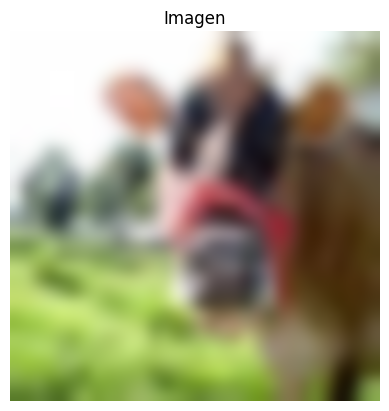

In [17]:
#%matplotlib notebook

import matplotlib.pyplot as plt

def mostrar_imagen(numero_imagen):
    # Take the image from the dataset
    image = numero_imagen
    # Display the image with interpolation
    plt.imshow(image, interpolation='bicubic')  # o use 'lanczos', 'bicubic', 'nearest' 'bilinear' para suevadad de la imagen
    plt.title("Imagen")
    plt.axis('off')
    plt.show()

def guardar_imagen(array_image,nombre_imagen:str):
    from PIL import Image
    imagen = Image.fromarray(array_image)
    # Guardar
    return imagen.save(nombre_imagen)

mostrar_imagen(dataset[dataset["indice_main"]==0]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))

## Valores Query 1

In [28]:
rmse=rmse_manual(dataset[dataset["indice_main"]==0]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==529]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y el metodo es {rmse}")

el rmse entre la imagen query y el metodo es 8641.518880208334


In [29]:
rmse=rmse_manual(dataset[dataset["indice_main"]==0]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==762]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y pixel es {rmse}")

el rmse entre la imagen query y pixel es 11715.498372395834


## Valores Query 2

In [30]:
rmse=rmse_manual(dataset[dataset["indice_main"]==316]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==85]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y el metodo es {rmse}")

el rmse entre la imagen query y el metodo es 3027.3570963541665


In [31]:
rmse=rmse_manual(dataset[dataset["indice_main"]==316]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==28]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y pixel es {rmse}")

el rmse entre la imagen query y pixel es 16818.169921875


## Valores Query 3

In [32]:
rmse=rmse_manual(dataset[dataset["indice_main"]==368]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==278]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y el metodo es {rmse}")

el rmse entre la imagen query y el metodo es 4881.691731770833


In [33]:
rmse=rmse_manual(dataset[dataset["indice_main"]==368]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==1]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y pixel es {rmse}")

el rmse entre la imagen query y pixel es 10648.0849609375


# Valores Query 4

In [34]:
rmse=rmse_manual(dataset[dataset["indice_main"]==732]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==711]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y el metodo es {rmse}")

el rmse entre la imagen query y el metodo es 22745.483723958332


In [35]:
rmse=rmse_manual(dataset[dataset["indice_main"]==732]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0),dataset[dataset["indice_main"]==677]["data_lista"].iloc[0].reshape(3,32,32).transpose(1,2,0))
print(f"el rmse entre la imagen query y pixel es {rmse}")

el rmse entre la imagen query y pixel es 24106.035481770832
